# Digits clustern

## Import Bibliotheken

In [148]:
# Import Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()  # for plot styling
from sklearn.neighbors import KNeighborsClassifier
import time

In [2]:
# Einlesen der Daten in die Variable "data"
raw_data = pd.read_csv("../data/zip.train", header=None, sep=" ")
raw_data_test = pd.read_csv("../data/zip.test", header=None, sep=" ")

# Ausgabe der Länge von data (Zeilen) 
print(len(raw_data),'Datensätze(Zeilen) importiert ')
print(len(raw_data_test),'Datensätze(Zeilen) importiert ')

7291 Datensätze(Zeilen) importiert 
2007 Datensätze(Zeilen) importiert 


In [3]:
# Abschneiden der letzten Spalte
data = raw_data.iloc[:,:-1]
data_test = raw_data_test
print("Shape data: ", data.shape)
print("Shape data: ", data_test.shape)

Shape data:  (7291, 257)
Shape data:  (2007, 257)


In [4]:
def showimage(a, *,data=data):
    image = data.iloc[a, 1:257].values.reshape(16,16)
    plt.figure(figsize=(10,8))
    sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
    plt.show
    

In [5]:
image = data.iloc[0,1:257].values.reshape(16,16)

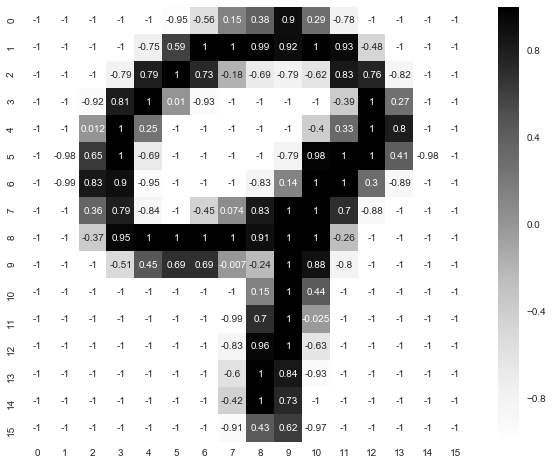

In [6]:
showimage(0,data=data_test)

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(image3, annot=True, center=0, cmap='PiYG')
plt.show

NameError: name 'image3' is not defined

<Figure size 720x576 with 0 Axes>

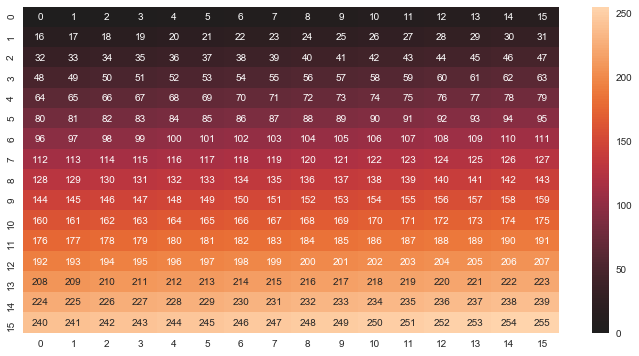

In [8]:
image4 = np.linspace(0,255,256, dtype=int).reshape(16,16)
plt.figure(figsize=(12,6))
sns.heatmap(image4, annot=True, center=0, fmt='d')
plt.show;

## KNN

In [9]:
exp = (data[0].values)
anzahl_neigbors = 3

In [10]:
neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm = 'brute')
neigh.fit(data.iloc[:,1:257], exp) 
data['KNN'] = neigh.predict(data.iloc[:,1:257])

In [11]:
results = []
for j in range(0,10):
        results.append(len(data[(data[0]==j) & (data['KNN']==j)]))
print('Fehler auf den Trainingsdaten:', (1 - (sum(results)/len(data)))*100,'%.')

Fehler auf den Trainingsdaten: 1.3304073515292836 %.


In [12]:
neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm='brute')
neigh.fit(data.iloc[:,1:257], exp) 
data_test['KNN_test'] = neigh.predict(data_test.iloc[:,1:257])

In [13]:
results = []
for j in range(0,10):
    results.append(len(data_test[(data_test[0]==j) & (data_test['KNN_test']==j)]))
print('Fehler auf den Testdaten:', (1 - (sum(results)/len(data_test)))*100,'%.')

Fehler auf den Testdaten: 5.530642750373693 %.


In [14]:
exp = (data[0].values)
err_train=[]
err_test=[]
k=[]
for i in range(1,10):
    anzahl_neigbors = i  
    k.append(i)
    
    #Trainingsdaten
    neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm = 'brute')
    neigh.fit(data.iloc[:,1:257], exp) 
    data['KNN'] = neigh.predict(data.iloc[:,1:257])
    results = []
    for j in range(0,10):
        results.append(len(data[(data[0]==j) & (data['KNN']==j)]))
    err_train.append((1 - (sum(results)/len(data)))*100)

    #Testdaten
    neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm='brute')
    neigh.fit(data.iloc[:,1:257], exp) 
    data_test['KNN_test'] = neigh.predict(data_test.iloc[:,1:257])
    results = []
    for j in range(0,10):
        results.append(len(data_test[(data_test[0]==j) & (data_test['KNN_test']==j)]))
    err_test.append((1 - (sum(results)/len(data_test)))*100)

opt_k = pd.DataFrame()
opt_k['k'] = k
opt_k['Fehler Trainingsdaten'] = err_train
opt_k['Fehler Testdaten'] = err_test


In [15]:
opt_k

,k,Fehler Trainingsdaten,Fehler Testdaten
0,1,0.000000,5.630294
1,2,1.632149,5.879422
2,3,1.330407,5.530643
3,4,1.933891,5.680120
4,5,2.084762,5.530643
5,6,2.413935,6.128550
6,7,2.578521,5.829596
7,8,2.756823,5.929248
8,9,2.907694,6.278027


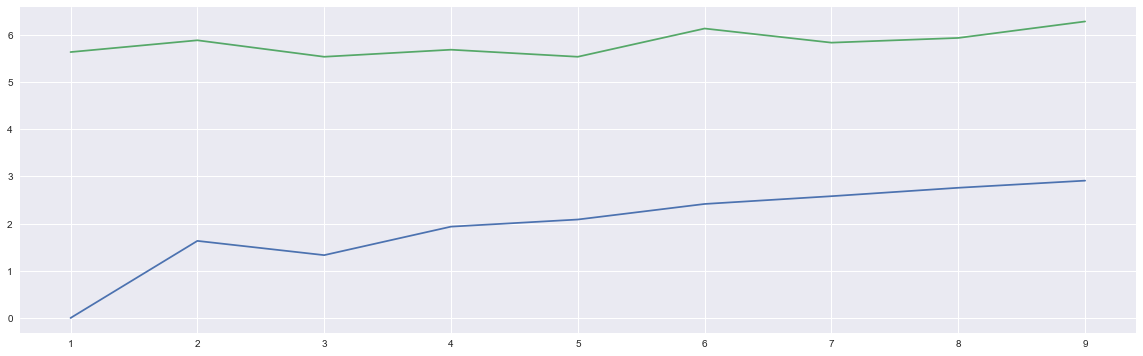

In [16]:
plt.figure(figsize=(20,6))
plt.plot(k,err_train)
plt.plot(k,err_test)
plt.show()

In [17]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,KNN_test
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,9.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,6.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,3.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,6.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,6.0


In [18]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten = []
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KNN']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
print('Ergebnisse: Trainingsdaten:')
print(results)
recognition_share = []
for i in range(0,10):
    recognition_share.append(results.iloc[i,i])
                             
recognition_share_total = sum(recognition_share)/results.loc['Total','Summe']
recognition_share_total

Ergebnisse: Trainingsdaten:
          0     1    2    3    4    5    6    7    8    9  Summe
0      1189     0    2    1    0    1    1    0    0    0   1194
1         0  1005    0    0    0    0    0    0    0    0   1005
2        10     3  693    5    3    0    2    9    5    1    731
3         3     1    2  641    1    3    0    1    6    0    658
4         3    14    3    0  611    0    5    1    0   15    652
5         8     1    4    7    2  529    3    0    0    2    556
6         9     1    0    0    1    1  652    0    0    0    664
7         0     4    0    0    5    0    0  627    0    9    645
8         4     6    2   16    2    2    1    4  502    3    542
9         2     0    0    1    1    0    0   10    0  630    644
Total  1228  1035  706  671  626  536  664  652  513  660   7291


0.9709230558222466

In [19]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten = []
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data_test[(data_test[0]==i) & (data_test['KNN_test']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
print('Ergebnisse: Testdaten:')
print(results)
recognition_share = []
for i in range(0,10):
    recognition_share.append(results.iloc[i,i])
                             
recognition_share_total = sum(recognition_share)/results.loc['Total','Summe']
recognition_share_total

Ergebnisse: Testdaten:
         0    1    2    3    4    5    6    7    8    9  Summe
0      354    0    2    0    1    0    1    0    0    1    359
1        0  259    0    0    3    0    2    0    0    0    264
2        7    2  180    2    1    0    0    2    4    0    198
3        3    0    2  154    0    5    0    1    0    1    166
4        0    4    2    0  179    0    2    2    0   11    200
5        5    0    1    4    0  145    0    0    1    4    160
6        3    0    2    0    2    1  161    0    1    0    170
7        0    3    1    0    4    1    0  137    0    1    147
8        7    3    2    3    0    3    1    0  144    3    166
9        1    0    1    0    1    1    0    5    0  168    177
Total  380  271  193  163  191  156  167  147  150  189   2007


0.9372197309417041

In [20]:
sum(recognition_share)

1881

In [21]:
results.loc['Total','Summe']

2007

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(data_test[0], data_test['KNN_test'] )

0.9372197309417041

## logistische Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(C=1, max_iter=300)

X = data.iloc[:,1:257]
y = data.iloc[:,0]

logReg.fit(X,y)

y_predicted = logReg.predict(X)
data['logReg'] = y_predicted

In [24]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten = []
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['logReg']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
print('Ergebnisse: Trainingsdaten:')
print(results)
recognition_share = []
for i in range(0,10):
    recognition_share.append(results.iloc[i,i])
                             
recognition_share_total = sum(recognition_share)/results.loc['Total','Summe']
recognition_share_total

Ergebnisse: Trainingsdaten:
          0     1    2    3    4    5    6    7    8    9  Summe
0      1191     0    1    0    1    1    0    0    0    0   1194
1         0  1004    0    0    0    0    0    0    1    0   1005
2         0     1  707    4    9    1    0    3    6    0    731
3         1     0    2  639    1    7    0    2    6    0    658
4         0     2    3    0  633    1    3    0    2    8    652
5         6     0    1    5    2  537    3    0    1    1    556
6         0     0    0    0    3    3  657    0    1    0    664
7         0     0    1    0    1    0    0  637    2    4    645
8         3     2    5    1    8    7    1    3  512    0    542
9         0     0    1    1    4    1    0    6    2  629    644
Total  1201  1009  721  650  662  558  664  651  533  642   7291


0.9801124674255932

In [25]:
X = data_test.iloc[:,1:257]
y_predicted = logReg.predict(X)
data_test['logReg'] = y_predicted

In [61]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten = []
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data_test[(data_test[0]==i) & (data_test['logReg']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
print('Ergebnisse: Testdaten:')
print(results)
recognition_share = []
for i in range(0,10):
    recognition_share.append(results.iloc[i,i])
                             
recognition_share_total = sum(recognition_share)/results.loc['Total','Summe']
recognition_share_total

Ergebnisse: Testdaten:
         0    1    2    3    4    5    6    7    8    9  Summe
0      349    0    2    2    3    0    0    0    2    1    359
1        0  252    1    3    4    0    2    1    1    0    264
2        5    0  167    4   10    1    2    3    6    0    198
3        3    0    3  142    2   10    0    3    2    1    166
4        1    1    4    1  177    2    3    3    2    6    200
5        4    0    0    9    2  140    0    0    1    4    160
6        1    0    2    0    3    2  161    0    1    0    170
7        2    0    2    1    4    0    0  132    0    6    147
8        6    0    3    4    2    5    1    1  142    2    166
9        0    1    2    0    2    0    0    4    1  167    177
Total  371  254  186  166  209  160  169  147  158  187   2007


0.911310413552566

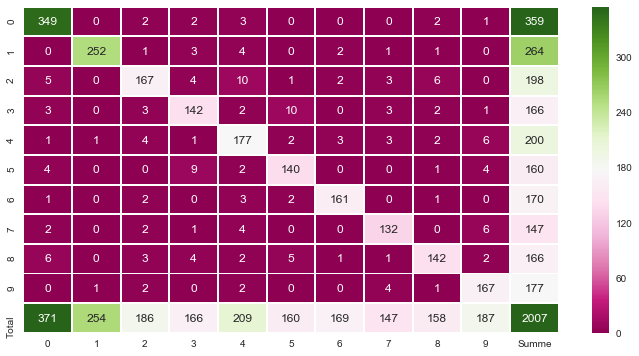

In [27]:
plt.subplots(figsize=(12,6))
sns.heatmap(results, annot=True, annot_kws={"size": 12}, linewidths=1, cmap='PiYG', fmt='d', robust=True);

In [249]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr_ = data_test.loc[:,'logReg'][data_test.iloc[:,0]==0]
tpr_ = logReg.predict_proba(data_test.iloc[:,1:257][data_test.iloc[:,0]==0])
tresh_ = data_test.loc[:,'logReg'][data_test.iloc[:,0]==0]
#logit_roc_auc = roc_auc_score(data_test.loc[:,'logReg'][data_test.iloc[:,0]==0], logReg.predict_proba(data_test.iloc[:,1:257][data_test.iloc[:,0]==0]),)
fpr, tpr, thresholds = roc_curve(fpr_, tpr_, tresh_)
plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: bad input shape (359, 10)

In [256]:
mask = (data_test.iloc[:,0]==0).astype(np.int)

0       0
1       0
2       0
3       0
4       0
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      0
       ..
1977    0
1978    0
1979    0
1980    0
1981    1
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    1
1991    0
1992    0
1993    1
1994    0
1995    1
1996    0
1997    0
1998    0
1999    0
2000    1
2001    0
2002    0
2003    0
2004    0
2005    1
2006    0
Name: 0, Length: 2007, dtype: int64

In [259]:
pd.DataFrame(logReg.predict_proba(data_test.iloc[:,1:257]))

,0,1,2,3,4,5,6,7,8,9
0,8.341940e-06,5.110863e-08,8.135594e-05,1.038934e-03,2.162472e-02,1.658823e-07,6.912125e-11,1.383394e-03,1.864739e-02,9.572156e-01
1,1.200416e-05,9.851776e-07,5.456810e-04,5.752420e-09,1.806874e-04,9.222849e-03,9.900377e-01,1.315065e-07,5.090489e-11,5.790650e-16
2,1.921259e-07,4.866275e-09,5.401843e-02,9.289896e-01,3.451864e-10,4.478280e-05,5.487997e-11,2.830607e-09,1.694588e-02,1.063575e-06
3,4.798551e-02,9.289604e-08,5.902605e-04,4.432421e-08,3.384656e-05,2.250619e-03,9.491072e-01,3.226645e-05,1.490285e-07,2.348540e-12
4,8.993998e-05,2.977946e-04,6.495198e-03,2.492110e-06,6.515720e-10,1.544620e-04,9.929484e-01,1.167354e-05,2.138185e-09,1.036871e-09
5,9.991477e-01,1.554928e-09,7.286509e-06,4.459323e-06,1.659212e-09,9.645740e-06,4.221673e-04,2.750731e-10,4.087354e-04,3.817762e-12
6,9.985491e-01,5.279724e-12,3.972628e-05,6.558009e-04,7.254791e-07,1.328762e-05,1.418745e-05,7.824445e-08,7.270477e-04,5.562190e-10
7,9.899093e-01,1.118492e-13,1.144064e-06,1.090119e-03,3.703918e-06,3.650905e-04,6.505728e-03,3.203230e-11,2.124950e-03,7.570663e-09
8,5.792502e-04,1.420654e-11,4.186667e-04,5.557599e-10,1.459980e-04,2.000716e-05,9.952174e-01,3.683792e-11,3.618716e-03,4.703324e-15
9,1.081445e-07,5.943543e-07,1.746214e-04,1.394364e-04,1.043969e-02,1.901106e-05,1.607151e-06,6.419440e-03,1.063998e-03,9.817415e-01


In [235]:
logReg.predict_proba(:,1)

ValueError: X has 1 features per sample; expecting 256

In [142]:
logReg.predict_proba(X)[:,1]

array([5.11086264e-08, 9.85177558e-07, 4.86627466e-09, ...,
       1.33860436e-08, 1.27729000e-14, 9.91216067e-01])

In [199]:
X['y'] = y
X['y_predicted'] = y_predicted

In [209]:
len(data_test.iloc[:,0][data_test.iloc[:,0]==0])

359

In [216]:
X.drop['y']

TypeError: 'method' object is not subscriptable

In [223]:
logReg.predict_proba(data_test.iloc[:,1:257][data_test.iloc[:,0]==0])

(359, 10)

In [207]:
data_test.loc[:,'logReg'][data_test.iloc[:,0]==0]

5       0.0
6       0.0
7       0.0
14      0.0
26      0.0
31      0.0
33      0.0
37      0.0
38      0.0
40      0.0
43      0.0
46      0.0
49      0.0
54      0.0
59      0.0
61      0.0
64      0.0
74      0.0
76      0.0
81      0.0
84      0.0
89      0.0
91      0.0
95      0.0
97      0.0
98      0.0
100     0.0
104     0.0
115     0.0
123     0.0
       ... 
1826    0.0
1829    0.0
1835    0.0
1841    0.0
1843    0.0
1850    0.0
1851    0.0
1863    0.0
1867    0.0
1883    0.0
1885    0.0
1890    0.0
1900    0.0
1905    0.0
1909    0.0
1911    0.0
1914    0.0
1925    0.0
1931    0.0
1935    0.0
1953    0.0
1955    0.0
1971    0.0
1976    0.0
1981    0.0
1990    0.0
1993    0.0
1995    0.0
2000    0.0
2005    0.0
Name: logReg, Length: 359, dtype: float64

In [220]:
data_test.iloc[:,1:257]

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.948,-0.561,0.148,0.384,0.904,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.000,-1.000,-1.000,-1.000
1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
2,-1.000,-1.000,-1.000,-0.593,0.700,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.000,-1.000,-1.000,-1.000
3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
4,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.858,-0.106,0.802,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.000,-1.000,-1.000,-1.000
5,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.195,1.000,0.054,-1.000,...,0.224,1.000,0.988,0.187,0.139,-0.641,-0.812,-1.000,-1.000,-1.000
6,-1.000,-1.000,-1.000,-1.000,-1.000,-0.785,0.775,0.268,-1.000,-1.000,...,0.729,1.000,0.973,0.111,-0.661,-1.000,-1.000,-1.000,-1.000,-1.000
7,-1.000,-1.000,-1.000,-1.000,-1.000,-0.914,-0.688,-0.736,0.956,0.300,...,0.872,1.000,1.000,1.000,0.817,-0.308,-1.000,-1.000,-1.000,-1.000
8,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.761,0.438,0.691,...,1.000,1.000,0.679,-0.017,-0.907,-1.000,-1.000,-1.000,-1.000,-1.000
9,-1.000,-1.000,-1.000,-1.000,-1.000,-0.904,-0.060,0.638,0.678,0.250,...,-0.567,0.642,-0.925,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000


In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' #% logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

SyntaxError: invalid syntax (<ipython-input-147-946cf2908fa8>, line 7)

In [137]:
def ROC_Curve_digit(end):
    X_train = data.iloc[:,1:end]
    X_test=test_data.iloc[:,1:end]
    Title =['digit 0', 'digit 1', 'digit 2','digit 3', 'digit 4', 'digit 5', 'digit 6','digit 7', 'digit 8', 'digit 9']

    fig=plt.figure(figsize=(15,15))
    for digit in range(0,10):
       #from sklearn.linear_model import LogisticRegression
       Y_train =(data.iloc[:,0]==digit).astype(np.int))
       log_reg = LogisticRegression()
       log_reg.fit(X_train,Y_train)
       y_proba = log_reg.predict_proba(X_test)
       result=pd.DataFrame()
       result["Y_test"]=test_data.iloc[:,0]
       result["Y_proba_TRUE"]=y_proba[:,1]
       result["Y_proba_FALSE"]=y_proba[:,0]

       y = result["Y_test"]
       scores = result["Y_proba_TRUE"]
       fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=digit)

       ax= fig.add_subplot(4,3,digit+1)

       ax.plot([0, 1], [0, 1], 'k--')
       ax.plot(fpr, tpr, label='LR')
       plt.xlabel('False positive rate')
       plt.ylabel('True positive rate')
       ax.legend(loc='best')
       ax.set_title(Title[digit])
       plt.tight_layout()

   plt.show()

SyntaxError: invalid syntax (<ipython-input-137-836e0c885b35>, line 9)

In [136]:
np.array(data_test[data_test['logReg'] == 0].astype(np.int))

array([[ 0, -1, -1, ..., -1,  0,  0],
       [ 0, -1, -1, ..., -1,  0,  0],
       [ 0, -1, -1, ..., -1,  0,  0],
       ...,
       [ 0, -1, -1, ..., -1,  0,  0],
       [ 0, -1, -1, ..., -1,  0,  0],
       [ 0, -1, -1, ..., -1,  0,  0]])

In [124]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,KNN_test,logReg
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,9.0,9.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,6.0,6.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,3.0,3.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,6.0,6.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,6.0,6.0


[349. 252. 167. 142. 177. 140. 161. 132. 142. 167.]
[10. 12. 31. 24. 23. 20.  9. 15. 24. 10.]


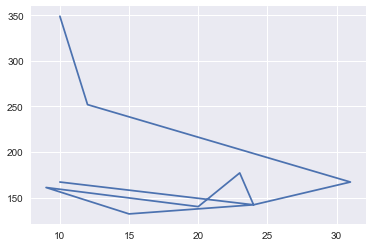

In [88]:
# ROC_Curve:
# Plotte die True Positive auf y gegenüber den False Positives auf der x Achse
roc_x = []
roc_y = []
for i in range(0,10):
    roc_y = np.append(roc_y, results.iloc[i,i])
    roc_x = np.append(roc_x,results.loc[i,'Summe'] - results.iloc[i,i])
print(roc_y)
print(roc_x)
plt.plot(roc_x,roc_y)


In [106]:
logReg.predict_proba(X)[,1]

SyntaxError: invalid syntax (<ipython-input-106-d59ccaf94a7d>, line 1)

In [103]:
roc_x = np.linspace(0,1,101)

## Playground:

In [ ]:
data_test[(data_test[0]==2) & (data_test['logReg']==4)]

In [ ]:
showimage(1403, data=data_test)

## Image Convolution

In [ ]:
from sklearn.preprocessing import MinMaxScaler
image = np.array(data_test.iloc[1316, 1:257].values)

kernel_matrix = np.array([-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,8,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1])
image_convolved = np.array(pd.DataFrame(np.convolve(image, kernel_matrix, mode='same')))
image = image.reshape(256,1)
#print(data)
#print(type(image_convolved))
#print(type(data_convolved))
#print(image_convolved.shape)
#print(image.shape)
#showimage(0)
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(-1, 1))

image_convolved = scaler.fit_transform(image_convolved)
#print(image_convolved)
#print(image)
res = image_convolved - image

# print((len(res)))
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(-1, 1))
res = scaler.fit_transform(res)
# print(res)
image = res.reshape(16,16)
plt.figure(figsize=(10,8))
sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
plt.show;
    

### -----alt

In [ ]:
showimage(0)
showimage(4,data=data_test)

In [ ]:
#Selektion aller Zeilen, die in der ersten Spalte den Wert 6 haben:
number_6 = pd.DataFrame(data[data[0] == 6])
number_6_test = pd.DataFrame(data_test[data_test[0] == 6])
#print(number_6)
print("Länge Cleaned Data:", len(data))
print("Länge Nummer 6:", len(number_6))

#Berechnung der Mittelwerte der Spalten über alle Zeilen bis zum vorletzten Wert
mean_image_6 = (pd.DataFrame(number_6.iloc[:,1:257].mean()))
print("Shape mean_image_6: ", mean_image_6.shape)


# print(image)
image = mean_image_6.values.reshape((16,16))
print("Image.shape:", image.shape)
plt.figure(figsize=(10,8))
sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
plt.show

In [ ]:
data_convolved[1] = image

In [ ]:
anzahl_cluster = 10
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0, ).fit(data.iloc[:,1:257])
data['KMcluster_nr'] = kmeans.predict(data.iloc[:,1:257])

In [ ]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KMcluster_nr']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results



In [ ]:
from sklearn.mixture import GaussianMixture
matrix = np.zeros(len(data)*256).reshape(len(data),256)
for i in range(1,256): 
    matrix[:,i] = data.iloc[:,i].values
                  
gmm = GaussianMixture(n_components=anzahl_cluster, n_init = 5, verbose = 1, random_state=0).fit(matrix)
data['GMM_cluster_nr'] = labels = gmm.predict(matrix)

In [ ]:
# Häufigkeit der wahren Ziffern im Datensatz
for i in range(0,10):
    print(i,':',len(data[data[0] == i]))

In [ ]:
# größe der Cluster im Datensatz
for i in range(0,10):
    print(i,':',len(data[data.loc[:,'GMM_cluster_nr'] == i]))


In [ ]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['GMM_cluster_nr']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results


In [ ]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means = np.array(real_means).reshape(10,256)

In [ ]:

        
from sklearn.mixture import GaussianMixture
matrix = np.zeros(len(data)*256).reshape(len(data),256)
for i in range(1,256): 
    matrix[:,i] = data.iloc[:,i].values
                  
gmm = GaussianMixture(n_components=anzahl_cluster, n_init = 5, verbose = 1, means_init = real_means, random_state=0).fit(matrix)
data['GMM_cluster_nr_with_means'] = labels = gmm.predict(matrix)

In [ ]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['GMM_cluster_nr_with_means']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results


In [ ]:
anzahl_cluster = 10
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0, init=real_means, n_init=1).fit(data.iloc[:,1:257])
data['KMcluster_nr_real_means'] = kmeans.predict(data.iloc[:,1:257])

In [ ]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KMcluster_nr_real_means']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results

In [ ]:
data

## ???

In [ ]:
len(data[(data[0] == 1) & (data[260 == 8])])

In [ ]:
data[0] == data.iloc[260]

# Notizen:

In [ ]:
real_means.shape

In [ ]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means2 = pd.DataFrame(np.array(real_means).reshape(10,256))

In [ ]:
real_means2

In [ ]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means = np.array(real_means).reshape(10,256)
real_means

In [ ]:
GMM: Größe der Cluster:
0 : 593
1 : 1197
2 : 398
3 : 1055
4 : 568
5 : 1549
6 : 504
7 : 647
8 : 408
9 : 372
    zum Vergleich: die Werte aus dem ersten durchlauf
0 : 1731
1 : 1075
2 : 328
3 : 491
4 : 659
5 : 288
6 : 453
7 : 1212
8 : 475
9 : 579


In [ ]:
percentage_df = data.groupby(['digit', 'cluster_nr']).agg({'result': 'sum'})
percentage_df2 = result_df.groupby(['digit']).agg({'result': 'sum'})
percentage_df.div(percentage_df2, level='digit') * 100

In [ ]:
#code-beispiel:
resultate=[0,1,2]
b=2
print(resultate)
resultate.append(b)
np.array(resultate).reshape(2,2)


In [ ]:
sdfk = pd.DataFrame()
sdfk['Spaltenamen'] = resultate
sdfk['name 2'] = resultate

In [ ]:
sdfk

In [ ]:
#Vergleich der Näherungsmethoden:
    
image_reshaped = mean_image_6.values.reshape((16,16))
plt.imshow(image_reshaped, cmap="hot", )
plt.show()

image_reshaped = mean_image_6.values.reshape((16,16))
plt.imshow(image_reshaped, cmap="hot", interpolation='sinc')
plt.show()

In [ ]:
mean_image_6 = pd.DataFrame(number_6.iloc[:,1:].mean())

plt.plot(mean_image_6)


In [ ]:
mean_image_6 = mean_image_6.iloc[1:,:]
mean_image_6
mpl.plot(mean_image_6)

In [ ]:
#image = image.iloc[1:,:]
mpl.plot(image)

In [ ]:
for x in range

In [ ]:
x = np.array([data[0]], dtype=np.float64)
shape = np.shape(data)
print(shape)
print("Size of the array: ", data.size)
print("Length of one array element in bytes: ", x.itemsize)
print("Total bytes consumed by the elements of the array: ", x.nbytes)

In [ ]:
image_inverted = image.inverted.values.reshape(16,16)
image_inverted.shape
plt.imshow(image_inverted, cmap="hot", interpolation='none')
plt.show()

In [ ]:
data[25]

In [ ]:
x = list(range(3,10,2))
print(x)

In [ ]:
images = data.iloc[:,1:] # select all rows, columns 1 to end

fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2
for i in range(0, columns*rows):
    digit_rows = images[data[0] == float(i)]
    mean_digit_rows = digit_rows.mean()
    img = mean_digit_rows.values.reshape(16,16)+1
    img = img**0.5
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,cmap="gray",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()